# Implementación contrastes o pruebas de Kolmogorov-Smirnov
# χ2, rachas, permutaciones y huecos 
# Generador de números aleatorios U(0,1) numpy y previo

Defina una cantidad de numeros aleatorios
10
Elija generador generadores de números aleatorios a evaluar:
1.RANDU --- xi+1=65539ximod231
2.Sinclair ZX81 --- xi+1=75ximod(216+1)
3.Numerical reciepes --- xi+1=1664525xi+1013904223mod232
4.Borland C/C++ --- xi+1=22695477xi+1mod232
2
* * * Sinclair ZX81 * * * xi+1=75ximod(216+1)
Elija la prueba a usar:
1.kolmogorov
2.rachas
3.chicuadrado
1
 * * * kolmogorov * * *
-----------------------------------------------


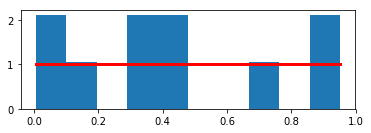

('KS =', 0.29480870088556438)
('Es uniforme, Da: ', 0.43006976178289963)


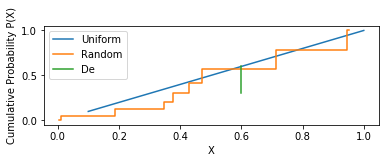

In [3]:
    import random
    import pylab as plt
    import calendar
    import numpy as np
    import math
    import scipy as sp
    import matplotlib.pyplot as plt
    import time
    def generadorRANDU(cantidad):
        a = 65539
        xo= 5
        c = 0
        m = 2**31
        n = cantidad
        nr=0
        numerosGenerados = []
        for i in range (0,n):
            div = ((a * xo) + c)/m
            mod = ((a*xo)+c)%m
            nr = float((mod+.0) / (m+.0))
            numerosGenerados.append(nr)
            xo = mod
        return numerosGenerados
    def generadorSinclairZX81(cantidad):
        a = 75
        xo= 5
        c = 0
        m = (2 ** 16) + 1
       
        n = cantidad
        nr=0
        numerosGenerados = []
        for i in range (0,n):
            div = ((a * xo) + c)/m
            mod = ((a*xo)+c)%m
            nr = float((mod+.0) / (m+.0))
            numerosGenerados.append(nr)
            xo = mod
        return numerosGenerados
    
    def generadorNumericalReciepes (cantidad):
        a = 1664525
        xo= 5
        c = 1013904223
        m = 2**32
       
        n = cantidad
        nr=0
        numerosGenerados = []
        for i in range (0,n):
            div = ((a * xo) + c)/m
            mod = ((a*xo)+c)%m
            nr = float((mod+.0) / (m+.0))
            numerosGenerados.append(nr)
            xo = mod
        return numerosGenerados
    def generadorBorlandC(cantidad):
        a = 22695477
        xo= 5
        c = 0
        m = 2**32
       
        n = cantidad
        nr=0
        numerosGenerados = []
        for i in range (0,n):
         
            div = ((a * xo) + c)/m
            mod = ((a*xo)+c)%m
            nr = float((mod+.0) / (m+.0))
            numerosGenerados.append(nr)
            xo = mod
        return numerosGenerados
    
    def kolmogorov(numerosGenerados):
        print("-----------------------------------------------")
        n = len(numerosGenerados)
        u = [1.0] * n
        plt.ion() 
        plt.subplot(2,1,1)
        count, bins, ignored = plt.hist(numerosGenerados, 10, normed=True)
        
        plt.plot(bins, np.ones_like(bins), linewidth=3, color = 'r')
        plt.show()
        
        x1 = np.arange(1/(n+0.0),1+1/(n+0.0),1/(n+0.0))
        y1 = np.cumsum(np.sort(u)/np.max(np.cumsum(u)))
        x2 = np.sort(numerosGenerados)
        y2 = np.cumsum(np.sort(numerosGenerados)/np.max(np.cumsum(numerosGenerados)))
    
        De=np.absolute(y2-y1)
        print ("KS =", np.max(De))
        plt.subplot(2,1,2)
        plt.plot(x1,y1,label='Uniform')
        plt.step(x2,y2,label='Random')
        x3 = [x1[De.argmax()],x1[De.argmax()]]
        y3 = [np.min([y1[De.argmax()],y2[De.argmax()]]),np.max([y1[De.argmax()],y2[De.argmax()]])]
        plt.step(x3,y3,label='De')
        
        plt.legend()
        plt.xlabel('X')
        plt.ylabel('Cumulative Probability P(X)')
        Da = (1.36/(n**0.5)+0.0)
        if np.max(De)< Da:
            print ('Es uniforme, Da: ',Da)
        else:
            print ('No es uniforme, Da: ',Da)
    
    def rachas(numerosGenerados):
        
        n = len(numerosGenerados)
        creciente = True
        rachasCrecientes = 0
        rachasDecrecientes = 0
        for i in range(len(numerosGenerados)):
            if(i == 0):
                if(numerosGenerados[i]<numerosGenerados[i+1]):
                    creciente = True
                    rachasCrecientes += 1
                else:
                    creciente = False
                    rachasDecrecientes += 1
            else:
                if(creciente == True):
                    if(numerosGenerados[i]<numerosGenerados[i-1]):
                        rachasDecrecientes += 1
                        creciente = False
                else:
                    if(numerosGenerados[i]>numerosGenerados[i-1]):
                        rachasCrecientes += 1
                        creciente = True
                        
        totalRachas = rachasCrecientes + rachasDecrecientes
        print ('Rachas Crecientes: ',rachasCrecientes)
        print ('Rachas Decrecientes: ',rachasDecrecientes)
        print ('Total de Rachas R: ',totalRachas)
        
        Z = (totalRachas-(2*n-1)/3)/((16*n-29)/90)**0.5
        print('a: ',(0.05))
        if(abs(Z) < 0.50978):
            print('El genrador es aleatorio. Z: ',Z)
        else:
            print ('El generador no es aleatorio Z: ',Z)
                        
    def chicuadrado(numerosGenerados): 
        n = len(numerosGenerados)
        k = 20
        fi, clases, nothing = plt.hist(numerosGenerados, k)
        ei = np.ones_like(clases)*(n/k)
    
        plt.plot(clases, ei, linewidth=3, color = 'r')
        plt.show()
        chi2 = 0
        ei = n/k
        for i in fi:
            chi2 += (i-ei)**2
        if chi2<=31.41:
            print ('El generador es uniforme x2=',chi2)
            print ('a: ',(0.05))
        else:
            print ('El generador no uniforme x2=',chi2)
            
        
            
    #Evaluar la calidad de los siguientes generadores de números aleatorios usando las pruebas implementadas en el punto
    #anterior:
    print("Defina una cantidad de numeros aleatorios")
    cantidad=int(input())
    
    print("Elija generador generadores de números aleatorios a evaluar:")
    print("1.RANDU --- xi+1=65539ximod231")
    print("2.Sinclair ZX81 --- xi+1=75ximod(216+1)")
    print("3.Numerical reciepes --- xi+1=1664525xi+1013904223mod232")
    print("4.Borland C/C++ --- xi+1=22695477xi+1mod232")
    generador=int(input())
    if generador == 1:
        #RANDU xi+1=65539ximod231
        print("* * * RANDU * * * xi+1=65539ximod231")
        print("Elija la prueba a usar:")
        print("1.kolmogorov")
        print("2.rachas")
        print("3.chicuadrado")
        prueba=int(input())
        if prueba == 1:
            print(" * * * kolmogorov * * *")
            kolmogorov(generadorRANDU(cantidad))
        if prueba == 2:
            print(" * * * Rachas * * *")
            rachas(generadorRANDU(cantidad))
        if prueba == 3:
            print(" * * * Chicuadrado * * *")
            chicuadrado(generadorRANDU(cantidad))
    
    if generador == 2:
       
        print("* * * Sinclair ZX81 * * * xi+1=75ximod(216+1)")
        print("Elija la prueba a usar:")
        print("1.kolmogorov")
        print("2.rachas")
        print("3.chicuadrado")
        prueba=int(input())
        if prueba == 1:
            print(" * * * kolmogorov * * *")
            kolmogorov(generadorSinclairZX81(cantidad))
        if prueba == 2:
            print(" * * * Rachas * * *")
            rachas(generadorSinclairZX81(cantidad))
        if prueba == 3:
            print(" * * * Chicuadrado * * *")
            chicuadrado(generadorSinclairZX81(cantidad))
    
    if generador == 3:
        
        print("* * * Numerical reciepes * * * xi+1=1664525xi+1013904223mod232")
        print("Elija la prueba a usar:")
        print("1.kolmogorov")
        print("2.rachas")
        print("3.chicuadrado")
        prueba=int(input())
        if prueba == 1:
            print(" * * * kolmogorov * * *")
            kolmogorov(generadorNumericalReciepes(cantidad))
        if prueba == 2:
            print(" * * * Rachas * * *")
            rachas(generadorNumericalReciepes(cantidad))
        if prueba == 3:
            print(" * * * Chicuadrado * * *")
            chicuadrado(generadorNumericalReciepes(cantidad))
    
    if generador == 4:
        
        print("* * * Borland C/C++ * * * xi+1=22695477xi+1mod232")
        print("Elija la prueba a usar:")
        print("1.kolmogorov")
        print("2.rachas")
        print("3.chicuadrado")
        prueba=int(input())
        if prueba == 1:
            print(" * * * kolmogorov * * *")
            kolmogorov(generadorBorlandC(cantidad))
        if prueba == 2:
            print(" * * * Rachas * * *")
            rachas(generadorBorlandC(cantidad))
        if prueba == 3:
            print(" * * * Chicuadrado * * *")
            chicuadrado(generadorBorlandC(cantidad))